In [146]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [147]:
# # !pip install comet_ml
# !pip install geopy

In [148]:
from comet_ml import Experiment
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="6Ga3e8coVWoOIpAreIY8DKEgJ",
    project_name="hotels",
    workspace="dekoz",
)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/dekoz/hotels/ca3e3f6231c0495dae42c8a0652adff2



In [149]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
random_state = 42
RANDOM_SEED = random_state

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import nltk

nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])
# Have a look at your list. You’ll notice lots of little words like “of,” “a,” “the,” and similar. 
# These common words are called stop words, and they can have a negative effect on your analysis because they occur so often in the text. 
# Thankfully, there’s a convenient way to filter them out.
stopwords = nltk.corpus.stopwords.words("english")

sent_analyzer = SentimentIntensityAnalyzer()

rev1 = "The hotel was very good, I love it!"
rev2 = "It was just horrible, the worst ever."

print(f"review 1:\n{rev1}\nScore: {sent_analyzer.polarity_scores(rev1)}")

print(f"\nreview 2:\n{rev2}\nScore: {sent_analyzer.polarity_scores(rev2)}")

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\Denis.kozarenko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Denis.kozarenko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\Denis.kozarenko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\state_union.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Denis.kozarenko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Denis.kozarenko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Denis.kozarenko\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_p

review 1:
The hotel was very good, I love it!
Score: {'neg': 0.0, 'neu': 0.386, 'pos': 0.614, 'compound': 0.8386}

review 2:
It was just horrible, the worst ever.
Score: {'neg': 0.603, 'neu': 0.397, 'pos': 0.0, 'compound': -0.8225}


In [4]:

    sentences = [
        ':)',
        ':(',
        'She is so :(',
        'I love the way cricket is played by the champions',
        'She neither likes coffee nor tea',
    ]
    senti = SentimentIntensityAnalyzer()
    print(' -- built-in intensity analyser --')
    for sentence in sentences:
        print('[{}]'.format(sentence), end=' --> ')
        kvp = senti.polarity_scores(sentence)
        for k in kvp:
            print('{} = {}, '.format(k, kvp[k]), end='')
        print() 

 -- built-in intensity analyser --
[:)] --> neg = 0.0, neu = 0.0, pos = 1.0, compound = 0.4588, 
[:(] --> neg = 1.0, neu = 0.0, pos = 0.0, compound = -0.4404, 
[She is so :(] --> neg = 0.555, neu = 0.445, pos = 0.0, compound = -0.5777, 
[I love the way cricket is played by the champions] --> neg = 0.0, neu = 0.375, pos = 0.625, compound = 0.875, 
[She neither likes coffee nor tea] --> neg = 0.318, neu = 0.682, pos = 0.0, compound = -0.3252, 


In [150]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [151]:
# Подгрузим наши данные из соревнования

# DATA_DIR = '/kaggle/input/sf-booking/'
DATA_DIR = 'data'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'/hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

COMET ERROR: Failed to log git patch


In [152]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [153]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [154]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [155]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [156]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [157]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [158]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [160]:
# Spleeting review_date column to year, month, day 
data['review_date'] = pd.to_datetime(data['review_date'], dayfirst=True)
data['year_ago'] = data['review_date'].apply(lambda x: x.year)
data['month'] = data['review_date'].apply(lambda x: x.month)
data['day'] = data['review_date'].apply(lambda x: x.day)
data.drop('review_date', axis=1, inplace=True)


In [181]:
data.loc[0]

hotel_address                                                Via Senigallia 6 20161 Milan Italy
additional_number_of_scoring                                                                904
average_score                                                                               8.1
hotel_name                                                                       Hotel Da Vinci
reviewer_nationality                                                            United Kingdom 
negative_review                                Would have appreciated a shop in the hotel th...
review_total_negative_word_counts                                                            52
total_number_of_reviews                                                                   16670
positive_review                                Hotel was great clean friendly staff free bre...
review_total_positive_word_counts                                                            62
total_number_of_reviews_reviewer_has_giv

In [199]:
a = 2
b = 3

lst= [a, b]
lst


[2, 3]

In [204]:
address = data['hotel_address']
address[6]

'Empire Way Wembley Brent London HA9 8DS United Kingdom'

In [205]:
from geopy.geocoders import Nominatim
import time

def get_coordinates(adress, lat, lng):
    geolocator = Nominatim(user_agent="my_request")
    for row in range(len(adress)):
        if data.loc[row, 'lat'] is None:
            lcn = geolocator.geocode(adress[row])
            lat[row] , lng[row] = lcn.latitude , lcn.longitude
            time.sleep(1)
            
    
    return None

get_coordinates(data['hotel_address'], data['lat'], data['lng'])
    


KeyboardInterrupt: 

In [120]:
data['lat'] = data['lat'].fillna(0, inplace=True)
data['lng'] = data['lng'].fillna(0, inplace=True)

In [121]:
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                                1
lng                                                1
sample                                             2
reviewer_score                                    38
year_ago                                           3
month                                         

<AxesSubplot:>

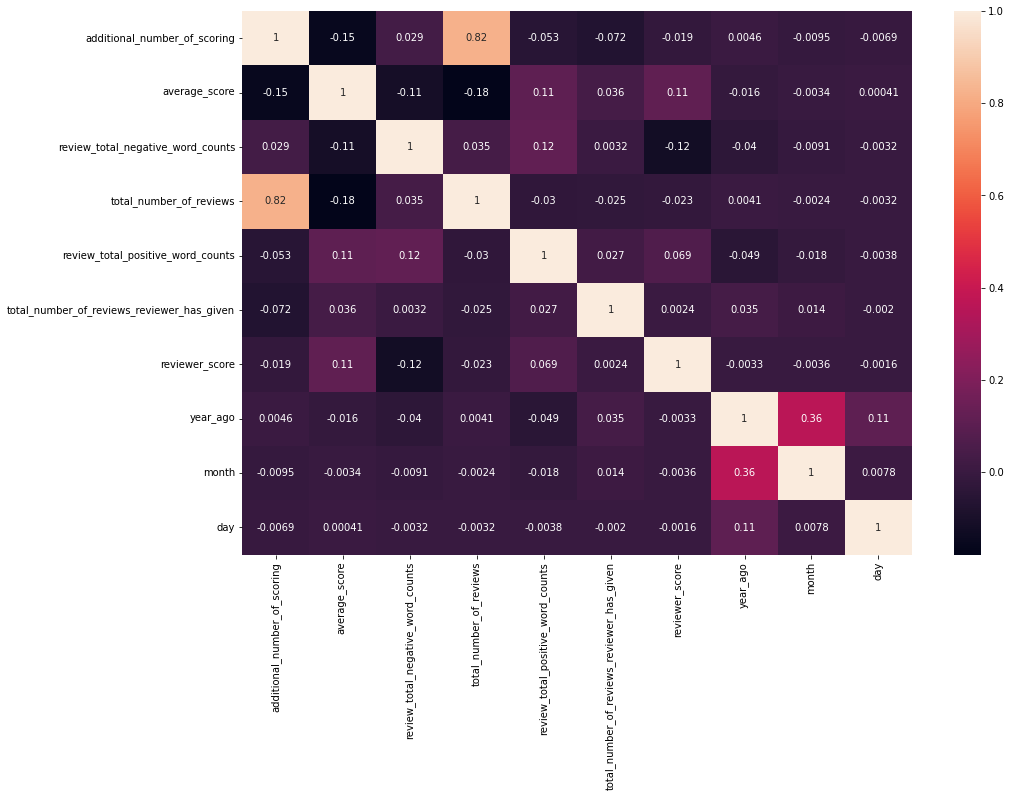

In [122]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [123]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 11 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   sample                                      515738 non-null  int64  
 7   reviewer_score                              515738 non-null  float64
 8   year_ago                                    515738 non-null  int64  
 9   month                                       515738 non-null  int64  
 

In [125]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [126]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [127]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 10), (386803, 10), (386803, 9), (309442, 9), (77361, 9))

In [128]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [129]:
n_estimators = 100

In [130]:
params={"random_state":random_state, 
        "n_estimators":n_estimators
 
}

In [131]:
experiment.log_parameters(params)

In [132]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=n_estimators, verbose=1, n_jobs=-1, random_state=random_state)

In [133]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished


In [134]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
import numpy as np
 
# Функция для вычисления MAPE
def mape_func(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
mape = mape_func(y_test, y_pred)
#mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', mape)
metric = {'MAPE': mape}

MAPE: 13.777297973454605


{'web': 'https://www.comet.ml/api/image/download?imageId=3da5e3a78a4743a4ba18c8a5252bc178&experimentKey=853cbc1b5d994bd3b4c7080744f7b56c',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=3da5e3a78a4743a4ba18c8a5252bc178&experimentKey=853cbc1b5d994bd3b4c7080744f7b56c',
 'imageId': '3da5e3a78a4743a4ba18c8a5252bc178'}

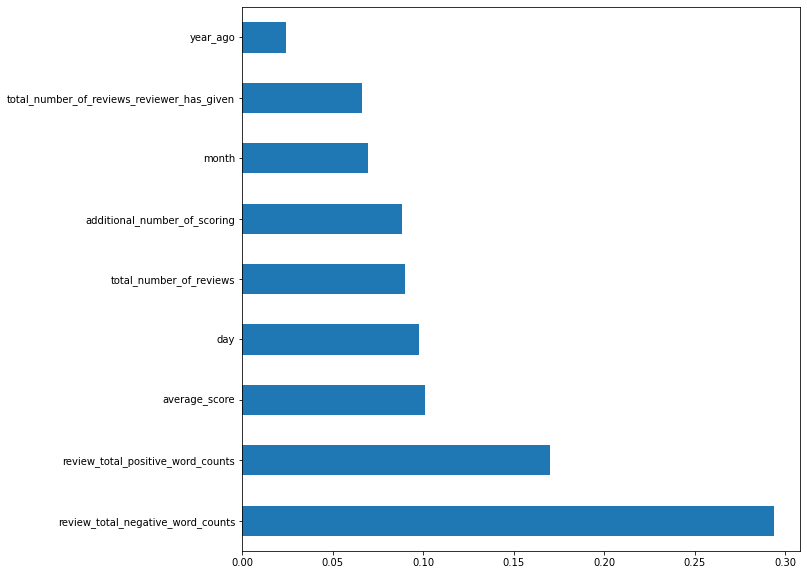

In [135]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
experiment.log_figure()

In [136]:
test_data.sample(10)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,year_ago,month,day
109040,121,7.9,0,534,3,4,0.0,1,1,9
98212,617,8.8,0,2213,3,5,0.0,2,8,13
99967,393,8.6,0,3823,45,7,0.0,2,8,20
44468,174,8.8,0,2464,11,3,0.0,2,10,9
118326,342,7.6,22,2310,31,3,0.0,1,9,8
13210,362,8.1,6,1294,24,2,0.0,0,2,8
72291,73,9.1,0,270,4,2,0.0,2,11,14
101669,520,7.8,20,2591,18,1,0.0,1,2,3
118550,44,7.5,5,397,2,2,0.0,0,10,4
58072,406,8.2,7,2011,7,1,0.0,1,5,7


In [137]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [138]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [139]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.3s finished


In [140]:
predict_submission

array([8.594, 6.902, 7.572, ..., 8.009, 9.626, 6.912])

In [141]:
list(sample_submission)

['reviewer_score', 'id']

In [142]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission_Y_M_D.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.594,488440
1,6.902,274649
2,7.572,374688
3,9.623,404352
4,9.662,451596
5,8.939,302161
6,7.475,317079
7,7.800,13963
8,8.884,159785
9,8.036,195089


In [143]:
experiment.log_metrics(metric)

In [144]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/dekoz/hotels/853cbc1b5d994bd3b4c7080744f7b56c
COMET INFO:   Metrics:
COMET INFO:     MAPE : 13.777297973454605
COMET INFO:   Parameters:
COMET INFO:     bootstrap                : True
COMET INFO:     ccp_alpha                : 0.0
COMET INFO:     criterion                : squared_error
COMET INFO:     max_depth                : 1
COMET INFO:     max_features             : 1.0
COMET INFO:     max_leaf_nodes           : 1
COMET INFO:     max_samples              : 1
COMET INFO:     min_impurity_decrease    : 0.0
COMET INFO:     min_samples_leaf         : 1
COMET INFO:     min_samples_split        : 2
COMET INFO:     min_weight_fraction_leaf : 0.0
COMET INFO:     n_estimators             : 100
COMET INFO:     n_jobs                   : -1
COMET INF